# Multiple Linear Regression

### Import libraries

In [35]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd

### Dataset: x_y_merged _droped_null.csv

In [19]:
# Read the csv file into a pandas DataFrame

df = pd.read_csv('x_y_merged _droped_null.csv')
df.head()

,country_code,Country Name,year,disbursement_amount,cancer,air_pollution_death,basic_sanitation,drinking_water,hand_wash,fuel_tech,...,tuberculosis,doctors,poisoning,unsafe_wash,nursing,tobacco,UHC_coverage,life_expectancy,UHC_data_access,population
0,AFG,Afghanistan,2005,5578020,34.1,95.12,28.04,29.54,36.87,14.0,...,189.0,2.37,2.20,13.92,5.82,42.00,34,60.30,0.49,25654277
1,AFG,Afghanistan,2010,10935083,31.7,95.12,34.18,40.52,37.22,20.0,...,189.0,2.37,2.11,13.92,5.82,42.00,34,60.30,0.49,29185507
2,AFG,Afghanistan,2015,26063,29.8,95.12,40.71,52.39,37.59,29.0,...,189.0,2.85,1.92,13.92,1.30,42.00,34,62.35,0.49,34413603
3,AFG,Afghanistan,2016,432348,29.8,95.12,42.05,54.84,37.67,31.0,...,189.0,2.78,1.89,13.92,1.48,42.00,38,62.35,0.49,35383128
4,AGO,Angola,2015,1110667,16.9,7.60,47.37,26.71,26.38,48.0,...,366.0,3.64,3.72,48.81,14.00,21.65,38,64.50,0.31,27884381


In [20]:
df.columns

Index(['country_code', 'Country Name', 'year', 'disbursement_amount', 'cancer',
       'air_pollution_death', 'basic_sanitation', 'drinking_water',
       'hand_wash', 'fuel_tech', 'crude_suicide', 'dentists', 'tuberculosis',
       'doctors', 'poisoning', 'unsafe_wash', 'nursing', 'tobacco',
       'UHC_coverage', 'life_expectancy', 'UHC_data_access', 'population'],
      dtype='object')

In [65]:
# Turn categorical variables into numbers
for label, content in df.items():
    # Check columns which aren't numeric
    if not pd.api.types.is_numeric_dtype(content):
        # print the columns that are objectt type
        print(label)
        df[label] = pd.Categorical(content).codes+1

country_code
Country Name


In [66]:
df.head()

,country_code,Country Name,year,disbursement_amount,cancer,air_pollution_death,basic_sanitation,drinking_water,hand_wash,fuel_tech,...,tuberculosis,doctors,poisoning,unsafe_wash,nursing,tobacco,UHC_coverage,life_expectancy,UHC_data_access,population
0,1,1,2005,5578020,34.1,95.12,28.04,29.54,36.87,14.0,...,189.0,2.37,2.20,13.92,5.82,42.00,34,60.30,0.49,25654277
1,1,1,2010,10935083,31.7,95.12,34.18,40.52,37.22,20.0,...,189.0,2.37,2.11,13.92,5.82,42.00,34,60.30,0.49,29185507
2,1,1,2015,26063,29.8,95.12,40.71,52.39,37.59,29.0,...,189.0,2.85,1.92,13.92,1.30,42.00,34,62.35,0.49,34413603
3,1,1,2016,432348,29.8,95.12,42.05,54.84,37.67,31.0,...,189.0,2.78,1.89,13.92,1.48,42.00,38,62.35,0.49,35383128
4,2,3,2015,1110667,16.9,7.60,47.37,26.71,26.38,48.0,...,366.0,3.64,3.72,48.81,14.00,21.65,38,64.50,0.31,27884381


### Variable exploration

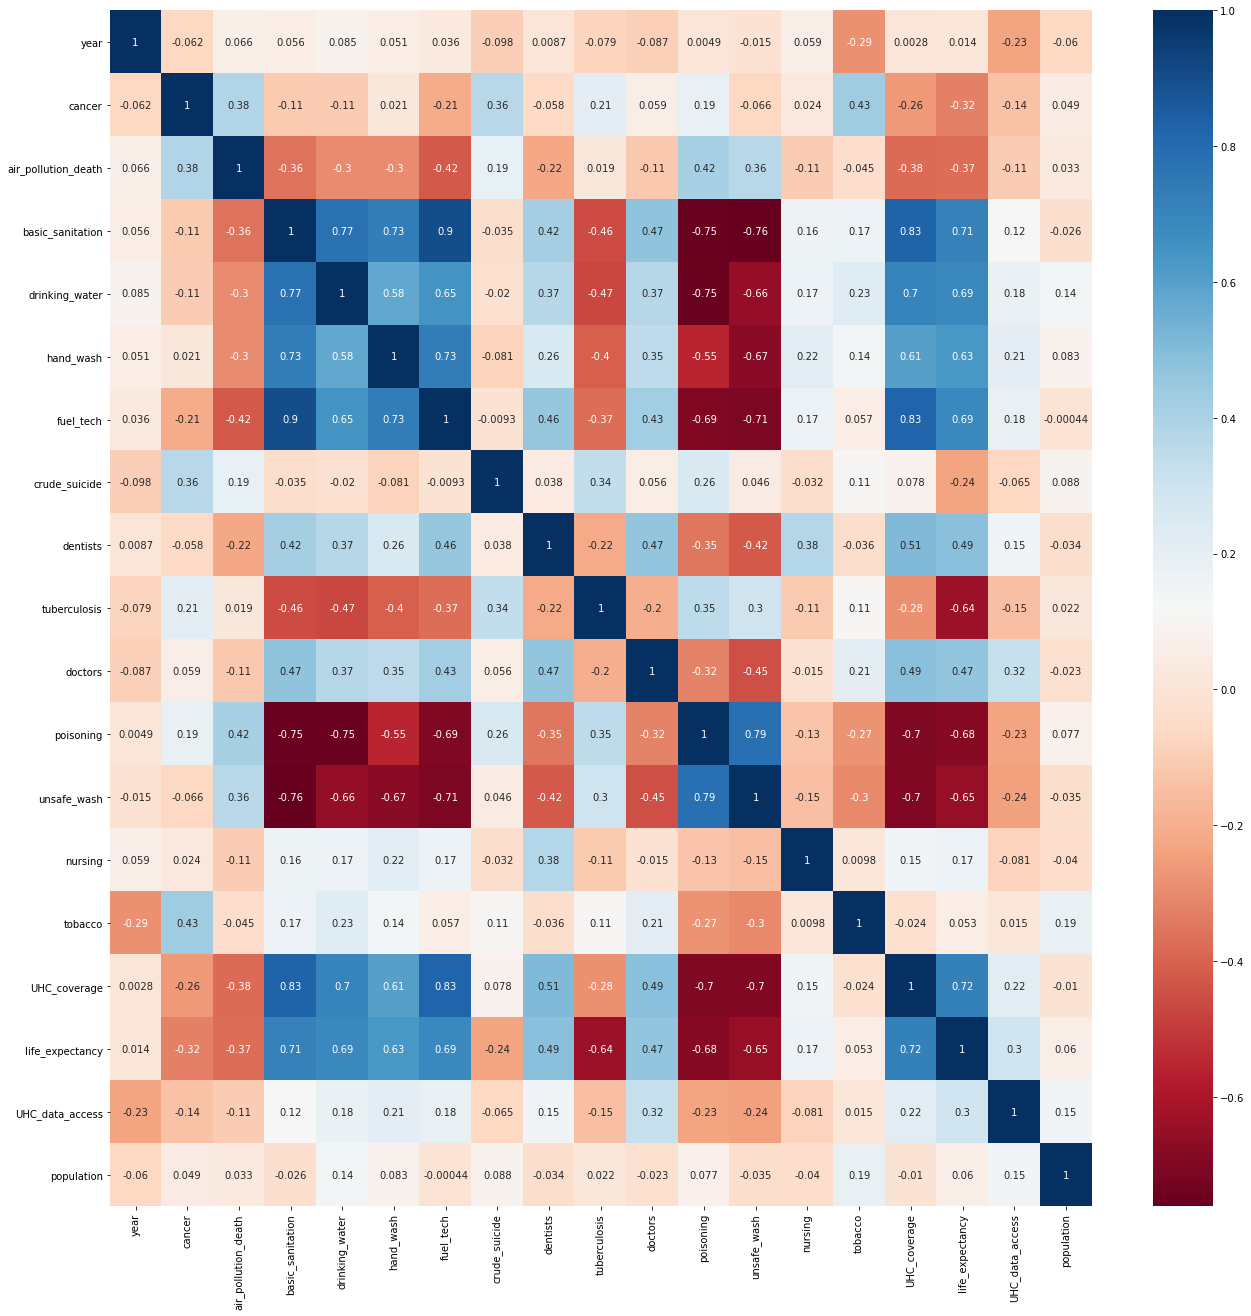

<Figure size 432x288 with 0 Axes>

In [67]:
# Correlation Matrix
f = plt.figure(figsize=(22, 22))
corrMatrix = X.corr()

sn.heatmap(corrMatrix, annot=True, cmap="RdBu")

plt.show()

plt.savefig('corrMatrix.png', bbox_inches='tight')

### Assign the data to X and y

In [73]:
X = df[['country_code','Country Name','year', 'cancer','air_pollution_death','basic_sanitation', 'drinking_water', 'hand_wash',
        'fuel_tech', 'crude_suicide', 'dentists', 'tuberculosis', 'doctors', 'poisoning', 'unsafe_wash',
        'nursing', 'tobacco','UHC_coverage', 'life_expectancy', 'UHC_data_access', 'population']]
y = df["disbursement_amount"].values.reshape(-1, 1)
print(X.shape, y.shape)

(123, 17) (123, 1)


###  Create the model using LinearRegression

In [74]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

### Coefficient

In [75]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X, y)

print(regr.coef_)

[[ 5.96038617e+05 -3.02102123e+05 -2.52764490e+06  8.01758749e+05
  -2.06459419e+04 -2.13763224e+05 -3.75592915e+05  1.13494670e+05
   3.06517594e+05 -5.00324668e+03 -5.66981274e+05 -2.65065510e+04
  -2.62943875e+04 -7.91312821e+06  4.62576795e+05  9.62023638e+02
   3.71153053e-03]]


In [76]:
from sklearn import linear_model
import statsmodels.api as sm
# with statsmodels

 
model = sm.OLS(y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.169
Model:                            OLS   Adj. R-squared (uncentered):              0.036
Method:                 Least Squares   F-statistic:                              1.267
Date:                Sat, 25 Sep 2021   Prob (F-statistic):                       0.228
Time:                        14:58:27   Log-Likelihood:                         -2256.1
No. Observations:                 123   AIC:                                      4546.
Df Residuals:                     106   BIC:                                      4594.
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [72]:
The result array represents the coefficient values of weight and volume.

year:4.74653456e-09
    cancer
disbursement_amount', 'cancer','air_pollution_death',
        'basic_sanitation', 'drinking_water', 'hand_wash', 'fuel_tech', 'crude_suicide', 'dentists',
        'tuberculosis', 'doctors', 'poisoning', 'unsafe_wash', 'nursing', 'tobacco','UHC_coverage',
        'life_expectancy', 'UHC_data_access', 'population'

These values tell us that if the weight increase by 1kg, the CO2 emission increases by 0.00755095g.

And if the engine size (Volume) increases by 1 cm3, the CO2 emission increases by 0.00780526 g.

I think that is a fair guess, but let test it!

We have already predicted that if a car with a 1300cm3 engine weighs 2300kg, the CO2 emission will be approximately 107g.

What if we increase the weight with 1000kg?

SyntaxError: invalid syntax (<ipython-input-72-c7d5ce145fcb>, line 1)

### Fit the model to the training data and calculate the scores for the training and testing data

In [47]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: 1.0


In [ ]:
### Plot the Residuals for the Training and Testing data

Text(0.5, 1.0, 'Residual Plot')

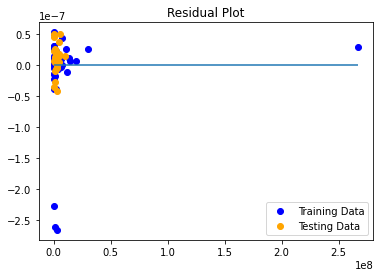

In [48]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")